<a href="https://colab.research.google.com/github/Kareem2168/training/blob/main/Hierarchical_Clustering_Gas_in_Place_(GIP)_and_EUR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from google.colab import files
files.upload()

Saving Chapter4_ GIP_EUR_DataSet.xlsx to Chapter4_ GIP_EUR_DataSet (1).xlsx


{'Chapter4_ GIP_EUR_DataSet.xlsx': b'PK\x03\x04\x14\x00\x06\x00\x08\x00\x00\x00!\x00b\xee\x9dh^\x01\x00\x00\x90\x04\x00\x00\x13\x00\x08\x02[Content_Types].xml \xa2\x04\x02(\xa0\x00\x02\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00

In [5]:
df=pd.read_excel('Chapter4_ GIP_EUR_DataSet.xlsx')
df.head()

,GIP (BCFperSection),EURper1000ft
0,49.5,1.710526
1,49.5,3.552632
2,52.8,0.263158
3,52.8,3.377193
4,56.1,1.754386


In [6]:
df.describe()

,GIP (BCFperSection),EURper1000ft
count,200.00000,200.000000
mean,199.84800,2.201754
std,86.67358,1.132611
min,49.50000,0.043860
25%,136.95000,1.524123
50%,202.95000,2.192982
75%,257.40000,3.201754
max,452.10000,4.342105


In [7]:
#in this case, we should standardized our data inorder to have accurate results (since there is large difference in numbers of both columns compared)


In [8]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
df_scaled=scaler.fit_transform(df)


"ward" minimizes the variance of the
clusters being merged. 

"average" uses the average of the distances of each
observation of the two sets. 

"complete" or "maximum" linkage uses the
maximum distances between all observations of the two sets. 

"single" uses the
minimum of the distances between all observations of the two sets. The default
linkage of "ward" was used in this example.

Text(0, 0.5, 'distance')

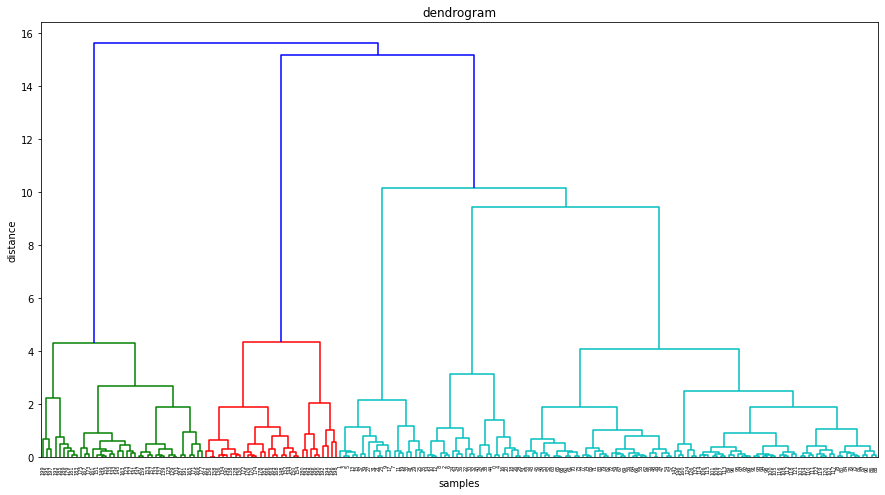

In [9]:
#Like other clustering methods, Ward's method starts with n clusters, each containing a single object. These n clusters are combined to make one cluster containing all objects. At each step, the process makes a new cluster that minimizes variance, measured by an index called E (also called the sum of squares index)

#here we need to use dendrogram to determine clusters needed 
plt.figure(figsize=(15, 8))
import scipy.cluster.hierarchy as shc 
dend=shc.dendrogram(shc.linkage(df_scaled, method='ward'))
plt.title('dendrogram')
plt.xlabel('samples')
plt.ylabel('distance')

In [10]:
# now we apply agglomerative clustering

from sklearn.cluster import AgglomerativeClustering 
HC=AgglomerativeClustering(5)
HC=HC.fit_predict(df_scaled)
HC

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 2,
       4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 0, 1, 0, 1,
       2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 2, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1])

In [11]:
#convert the scaled df to dataframe
#add a new column with HC

df_new=pd.DataFrame(df_scaled, columns=['GIP(BCFperSection)', 'EUR/1000ft'])
df_new['clusters']=HC
df_new

,GIP(BCFperSection),EUR/1000ft,clusters
0,-1.738999,-0.434801,4
1,-1.738999,1.195704,3
2,-1.700830,-1.715913,4
3,-1.700830,1.040418,3
4,-1.662660,-0.395980,4
...,...,...,...
195,2.268791,1.118061,1
196,2.497807,-0.861839,0
197,2.497807,0.923953,1
198,2.917671,-1.250054,0


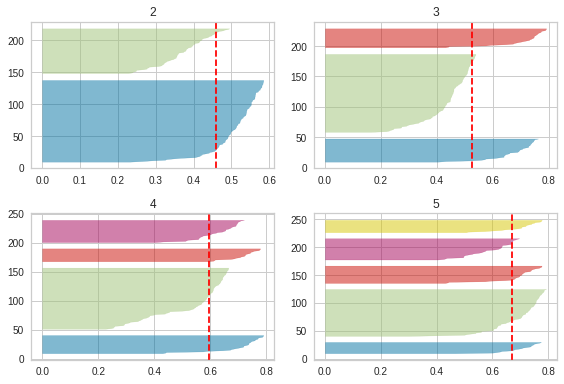

In [12]:
#using K Means 
from sklearn.cluster import KMeans
from yellowbrick.cluster import SilhouetteVisualizer
fig, ax=plt.subplots(2,2)
for i in [2,3,4,5]:
  km=KMeans(i)
  q,mod=divmod(i,2)
  visualizer=SilhouetteVisualizer(km,ax=ax[q-1,mod], colors='yellowbrick')
  ax[q-1,mod].set_title(i)
  visualizer.fit(df_new)

plt.tight_layout()

In [14]:
# see the score for 1 cluster 
from sklearn.metrics import silhouette_samples, silhouette_score
km=KMeans(5)
km.fit_predict(df_new)
score=silhouette_score(df_new,km.labels_, metric='euclidean')
score


0.6683754206366562

In [ ]:
#################################################

In [ ]:
#Silhouette method to get the score
#for visualizing the whole 5 clusters we use the following 


Text(0, 0.5, 'clusters')

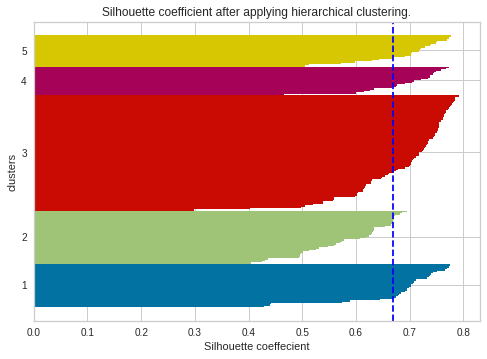

In [15]:

cluster_labels=np.unique(HC)
silhouette_vals=silhouette_samples(df_new, HC)
ylow=yupp=0
yticks=[]
for i, c in enumerate(cluster_labels):
  c_silh_vals=silhouette_vals[HC==c]
  c_silh_vals.sort()
  
  yupp+=len(c_silh_vals)
  plt.barh(range(ylow,yupp), c_silh_vals, height=1)
  yticks.append((ylow+yupp)/2)
  ylow+=len(c_silh_vals)

silhouette_avg=np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color='blue', linestyle='--')
plt.title('Silhouette coefficient after applying hierarchical clustering.')
plt.xlabel('Silhouette coeffecient')
plt.yticks(yticks,cluster_labels+1)
plt.ylabel('clusters')

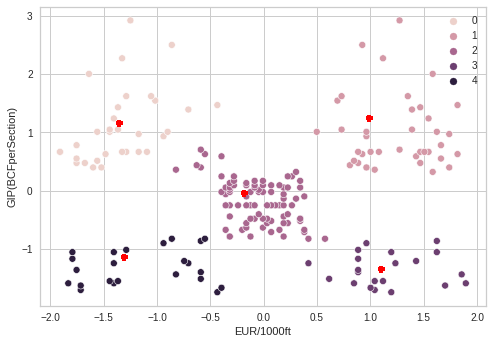

In [16]:
#assign centroids to clusters
KM=km.cluster_centers_
sns.scatterplot(x=df_new['EUR/1000ft'],y=df_new['GIP(BCFperSection)'], hue=df_new['clusters'])
plt.scatter(KM[:, 0], KM[:, 1], marker='+', color='red', linewidth=4)
plt.legend()

In [17]:
#to see each each cluster and its mean values 
df_new.groupby(by='clusters').count()

,GIP(BCFperSection),EUR/1000ft
clusters,,
0,32,32
1,39,39
2,85,85
3,21,21
4,23,23
